# Download Cactus

Step 0 is to set some path variables and cd to the desired working directory.

In [63]:
etk_dir='/home/ejwest/ETK'
sims_dir='/home/ejwest/ETK/simulations'

In [29]:
%mkdir -vp {etk_dir}
%mkdir -vp {sims_dir}
%cd {etk_dir}

/home/ejwest/ETK


Step 1 is to download `GetComponents` (here we use curl to do this).

In [30]:
!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2018_02/GetComponents

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   312k      0 --:--:-- --:--:-- --:--:--  311k


Step 2 is to download your thornlist (again we use curl to do this). In this tutorial, we are going to use `funwave_carpet.th`, a collection of thorns designed to simulate water waves using the Boussinesq equations.

In [31]:
!curl -O -L https://bitbucket.org/stevenrbrandt/cajunwave/raw/master/funwave_carpet.th

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3994  100  3994    0     0  10972      0 --:--:-- --:--:-- --:--:-- 10942


View the thornlist using `%pycat`. Note that at the top of the file is `DEFINE_ROOT = CactusFW2`. This means that Cactus, and all its thorns, will be checked out under that directory.

In [32]:
%pycat ./funwave_carpet.th

Next we need to checkout the components listed in the thornlist. We do this by executing the `GetComponents` script. Before we can execute it, however, we need to turn on its execute bit.

In [33]:
!chmod a+x GetComponents
!echo no|./GetComponents --parallel funwave_carpet.th

-----------------------------------------------------------------
  Checking out module: CactusNumerical/MoL
      from repository: https://bitbucket.org/cactuscode/cactusnumerical.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/HDF5
      from repository: https://svn.cactuscode.org/projects/ExternalLibraries/HDF5/trunk
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/pciutils
      from repository: https://svn.cactuscode.org/projects/ExternalLibraries/pciutils/trunk
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: README.md
      from repository: https://bitbucket.org/simfactory/simfactory2.git
                 into: CactusFW2/simfactory
                   as: simfactory2
-------------------

-----------------------------------------------------------------
  Checking out module: ExternalLibraries/OpenCL
      from repository: https://svn.cactuscode.org/projects/ExternalLibraries/OpenCL/trunk
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CONTRIBUTORS
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: CactusCoastal/FunwaveMesh
      from repository: https://bitbucket.org/stevenrbrandt/cajunwave.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CactusCoastal/FunwaveCoord
      from repository: https://bitbucket.org/stevenrbrandt/cajunwave.git
                 into: CactusFW2/arrangements
--------------------------------------------------

Now define a shortcut to the funwave directory and then cd to it.

In [34]:
funwave_dir = '/home/ejwest/ETK/CactusFW2'
%cd {funwave_dir}

/home/ejwest/ETK/CactusFW2


# Configure Simfactory

Cactus is built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. Please enter your email address in the
`--setup-email` field in the line below and execute. (The email address isn't sent anywhere, all it's used for is allowing Cactus to send job change state notifications to you.)

In [35]:
%cd {funwave_dir}
!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu

/home/ejwest/ETK/CactusFW2
Unknown machine name newton


Here we will define some necessary Simulation Factory defaults.


Determining local machine name: newton
Creating machine newton from generic: machine newton [/home/ejwest/ETK/CactusFW2/repos/simfactory2/mdb/machines/newton.ini] created successfully

--------------------SUMMARY--------------------:


[default]
user            = ejwest
email           = ewest@d.umn.edu
allocation      = NO_ALLOCATION


------------------END SUMMARY------------------:

Contents successfully written to /home/ejwest/ETK/CactusFW2/repos/simfactory2/etc/defs.local.ini


In [36]:
!hostname

newton


Next create a shortcut variable for the mdb file. Change the name of the `<machine>.ini` file in the path below to your machine name, returned by the hostname command above.

In [37]:
mdb_file='/home/ejwest/ETK/CactusFW2/simfactory/mdb/machines/newton.ini'
!echo {mdb_file}

/home/ejwest/ETK/CactusFW2/simfactory/mdb/machines/newton.ini


Change where simulation output data are dumped and number of procs (the number of logical cores on your machine, i.e., number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores).

In [38]:
basedir=sims_dir
ppn=2
maxnumthreads=2
numthreads=2

Now run the following `awk` script to update the mdb file.

In [39]:
# uncomment these lines if you changed basedir
!awk -n '/^basedir *=/ {{gsub($3, "'{basedir}'")}}; \
         /^ppn *=/ {{gsub($3, "'{ppn}'")}}; \
         /^max-num-threads *=/ {{gsub($3, "'{maxnumthreads}'")}}; \
         /^num-threads *=/ {{gsub($3, "'{numthreads}'")}}; \
         {{print}}' $mdb_file > {mdb_file}.tmp
%mv {mdb_file}.tmp {mdb_file}

View the mdb file using `%pycat` and verify that the change (if any) stuck.

In [40]:
%pycat {mdb_file}

# Build Cactus

To start from a clean slate, let's remove any previous configurations. (Otherwise, comment out the following line.)

In [42]:
%cd {funwave_dir}
%rm -rf ./configs/*

/home/ejwest/ETK/CactusFW2


Now build Cactus using our thornlist.

In [43]:
%cd {funwave_dir}
!time ./simfactory/bin/sim build -j2 --thornlist=repos/cajunwave/funwave_carpet.th 

/home/ejwest/ETK/CactusFW2
Using configuration: sim
Reconfiguring sim
Writing configuration to: /home/ejwest/ETK/CactusFW2/configs/sim/OptionList
Cactus - version: 4.2.3
Reconfiguring sim.
Adding configuration options from '/home/ejwest/ETK/CactusFW2/configs/sim/OptionList'...
  Setting VERSION to '2018-12-13'
  Setting CPP to 'cpp'
  Setting CC to 'gcc'
  Setting CXX to 'g++'
  Setting FPP to 'cpp'
  Setting F90 to 'gfortran'
  Setting CPPFLAGS to ''
  Setting FPPFLAGS to '-traditional'
  Setting CFLAGS to '-g -std=gnu99'
  Setting CXXFLAGS to '-g -std=gnu++11'
  Setting F90FLAGS to '-g -fcray-pointer -ffixed-line-length-none'
  Setting LDFLAGS to '-rdynamic'
  Setting DEBUG to 'no'
  Setting CPP_DEBUG_FLAGS to ''
  Setting C_DEBUG_FLAGS to ''
  Setting CXX_DEBUG_FLAGS to ''
  Setting OPTIMISE to 'yes'
  Setting CPP_OPTIMISE_FLAGS to ''
  Setting C_OPTIMISE_FLAGS to '-O2'
  Setting CXX_OPTIMISE_FLAGS to '-O2'
  Setting F90_OPTIMISE_FLAGS to '-O2'
  Setting PROFILE to 'no'
  Setting CP

           Implements: LocalReduce
           0 Public, 0 Protected, 0 Private variable groups
   LoopControl
           Implements: LoopControl
           Inherits:  CycleClock 
           0 Public, 0 Protected, 0 Private variable groups
   MPI
           Implements: MPI
           0 Public, 0 Protected, 0 Private variable groups
   MoL
           Implements: MethodOfLines
           0 Public, 0 Protected, 9 Private variable groups
   NaNChecker
           Implements: NaNChecker
           Inherits:  Reduce 
           0 Public, 0 Protected, 3 Private variable groups
   SpaceMask
           Implements: SpaceMask
           Inherits:  grid 
           2 Public, 0 Protected, 0 Private variable groups
   SphericalSurface
           Implements: SphericalSurface
           Inherits:  grid 
           9 Public, 0 Protected, 1 Private variable groups
   SymBase
           Implements: SymBase
           0 Public, 0 Protected, 0 Private variable groups
   SystemTopology
           Implements: 

Finished running configuration script for thorn ZLIB.

********************************************************************************
Running configuration script for thorn HWLOC:
hwloc selected, but HWLOC_DIR not set. Checking some places...
Found hwloc in NO_BUILD
Finished running configuration script for thorn HWLOC.

********************************************************************************
Running configuration script for thorn MPI:
MPI selected, but MPI_DIR is not set. Computing settings...
Found MPI compiler wrapper at /usr/bin/mpic++!
Successfully configured MPI.
Finished running configuration script for thorn MPI.

********************************************************************************
Running configuration script for thorn HDF5:
Additional requested language support:  Fortran
HDF5 selected, but HDF5_DIR not set. Checking pkg-config ...
HDF5 found: /usr
Finished running configuration script for thorn HDF5.
Checking consistency...
Creating Thorn-Flesh bindings.

COMPILING Carpet/LoopControl/src/loopcontrol.F90
COMPILING Carpet/LoopControl/src/type_sizes.F90
COMPILING configs/sim/bindings/build/LoopControl/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_LoopControl.a
Checking status of thorn MPI
COMPILING configs/sim/bindings/build/MPI/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_MPI.a
Checking status of thorn CarpetLib
COMPILING Carpet/CarpetLib/src/backtrace.cc
COMPILING Carpet/CarpetLib/src/balance.cc
COMPILING Carpet/CarpetLib/src/bbox.cc
COMPILING Carpet/CarpetLib/src/bboxset.cc
COMPILING Carpet/CarpetLib/src/bboxset1.cc
COMPILING Carpet/CarpetLib/src/bboxset2.cc
COMPILING Carpet/CarpetLib/src/bintree.cc
COMPILING Carpet/CarpetLib/src/cacheinfo.cc
COMPILING Carpet/CarpetLib/src/commstate.cc
COMPILING Carpet/CarpetLib/src/data.cc
COMPILING Carpet/CarpetLib/src/defs.cc
COMPILING Carpet/CarpetLib/src/dh.cc
COMPILING Carpet/CarpetLib/src/dist.cc
COMPILING Carpet/CarpetLib/s

Checking status of thorn CarpetMask
COMPILING Carpet/CarpetMask/src/mask_excluded.cc
COMPILING Carpet/CarpetMask/src/mask_surface.cc
COMPILING configs/sim/bindings/build/CarpetMask/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetMask.a
Checking status of thorn CarpetReduce
COMPILING Carpet/CarpetReduce/src/mask_allocate.cc
COMPILING Carpet/CarpetReduce/src/mask_init.cc
COMPILING Carpet/CarpetReduce/src/mask_set.cc
COMPILING Carpet/CarpetReduce/src/mask_test.cc
COMPILING Carpet/CarpetReduce/src/mask_carpet.cc
COMPILING Carpet/CarpetReduce/src/mask_coords.cc
COMPILING Carpet/CarpetReduce/src/reduce.cc
COMPILING configs/sim/bindings/build/CarpetReduce/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetReduce.a
Checking status of thorn CarpetRegrid
COMPILING Carpet/CarpetRegrid/src/automatic.cc
COMPILING Carpet/CarpetRegrid/src/baselevel.cc
COMPILING Carpet/CarpetRegrid/src/centre.cc
COMPILING Carpet/CarpetRegrid/

COMPILING CactusCoastal/Funwave/src/derivative.cc
COMPILING CactusCoastal/Funwave/src/mask.cc
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/mask.cc: In function ‘void funwave_update_mask(cGH*)’:
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/mask.cc:123:20: warning: variable ‘mask_ptr’ set but not used [-Wunused-but-set-variable]
   const CCTK_REAL *mask_ptr;
                    ^~~~~~~~
COMPILING CactusCoastal/Funwave/src/boundary.cc
COMPILING CactusCoastal/Funwave/src/paramcheck.cc
COMPILING CactusCoastal/Funwave/src/depth.cc
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/depth.cc: In function ‘void readmatrix(cGH*, const char*, CCTK_REAL8*)’:
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/depth.cc:499:16: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
   for(int i=0;i<vint.size();i++)
               ~^~~~~~~~~~~~
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/depth.cc:571:22: warning: comparison between signed and 

COMPILING CactusNumerical/LocalReduce/src/Norm1Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm2.c
COMPILING CactusNumerical/LocalReduce/src/Norm2Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm3.c
COMPILING CactusNumerical/LocalReduce/src/Norm3Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm4.c
COMPILING CactusNumerical/LocalReduce/src/Norm4Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNormInf.c
COMPILING CactusNumerical/LocalReduce/src/NormInfFunctions.c
COMPILING configs/sim/bindings/build/LocalReduce/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_LocalReduce.a
Checking status of thorn MoL
COMPILING CactusNumerical/MoL/src/AB.c
COMPILING CactusNumerical/MoL/src/ChangeType.c
COMPILING CactusNumerical/MoL/src/Counter.c
COMPILING CactusNumerical/MoL/src/Euler.c
COMPILING CactusNumerical/MoL/src/GenericRK.c
COMPILING CactusNumerical/MoL/src/ICN.c
COMPILING CactusNumerical/MoL/src

COMPILING configs/sim/bindings/build/TestLoopControl/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_TestLoopControl.a
Checking status of thorn Time
COMPILING CactusBase/Time/src/Courant.c
COMPILING CactusBase/Time/src/Given.c
COMPILING CactusBase/Time/src/Initialise.c
COMPILING CactusBase/Time/src/Simple.c
COMPILING configs/sim/bindings/build/Time/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_Time.a
Checking status of thorn Tridiagonal
COMPILING CactusCoastal/Tridiagonal/src/tridiagonalx.cc
COMPILING CactusCoastal/Tridiagonal/src/tridiagonaly.cc
COMPILING configs/sim/bindings/build/Tridiagonal/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_Tridiagonal.a
Checking status of thorn Tridiagonal2
COMPILING CactusCoastal/Tridiagonal2/src/trid.cc
COMPILING CactusCoastal/Tridiagonal2/src/trid_test_x.cc
COMPILING CactusCoastal/Tridiagonal2/src/trid_test_y.cc
COMPILING CactusCoastal/Tridiagon

COMPILING Cactus/comm/Interp.c
COMPILING Cactus/comm/Reduction.c
COMPILING Cactus/util/CactusTimers.c
COMPILING Cactus/util/File.c
COMPILING Cactus/util/ParseFile.c
COMPILING Cactus/util/RegisterKeyedFunction.c
COMPILING Cactus/util/StoreKeyedData.c
COMPILING Cactus/util/StoreNamedData.c
COMPILING Cactus/util/Misc.c
COMPILING Cactus/util/StoreHandledData.c
COMPILING Cactus/util/SKBinTree.c
COMPILING Cactus/util/Hash.c
COMPILING Cactus/util/Malloc.c
COMPILING Cactus/util/Math.c
COMPILING Cactus/util/String.c
COMPILING Cactus/util/StringList.c
COMPILING Cactus/util/Table.c
COMPILING Cactus/util/Time.c
COMPILING Cactus/util/Network.c
COMPILING Cactus/main/ActiveThorns.c
COMPILING Cactus/main/Banner.c
COMPILING Cactus/main/CactusDefaultInitialise.c
COMPILING Cactus/main/CactusDefaultEvolve.c
COMPILING Cactus/main/CactusDefaultShutdown.c
COMPILING Cactus/main/CactusDefaultMainLoopIndex.c
COMPILING Cactus/main/CallStartupFunctions.c
COMPILING Cactus/main/CommandLine.c
COMPILING Cactus/main/C

COMPILING configs/sim/bindings/Parameters/SystemTopology_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestCarpetGridInfo_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLoopControl_Parameters.c
COMPILING configs/sim/bindings/Parameters/Time_Parameters.c
COMPILING configs/sim/bindings/Parameters/Timers_Parameters.c
COMPILING configs/sim/bindings/Parameters/Tridiagonal_Parameters.c
COMPILING configs/sim/bindings/Parameters/Tridiagonal2_Parameters.c
COMPILING configs/sim/bindings/Parameters/Vectors_Parameters.c
COMPILING configs/sim/bindings/Parameters/hwloc_Parameters.c
COMPILING configs/sim/bindings/Parameters/zlib_Parameters.c
COMPILING configs/sim/bindings/Variables/BindingsVariables.c
COMPILING configs/sim/bindings/Variables/AEILocalInterp.c
COMPILING configs/sim/bindings/Variables/Boundary.c
COMPILING configs/sim/bindings/Variables/Cactus.c
COMPILING configs/sim/bindings/Variables/Carpet.c
COMPILING configs/sim/bindings/Variables/CarpetEvolutionMask.c
COMPILING 

Compiling /home/ejwest/ETK/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5toascii_slicer.cc
Creating hdf5toascii_slicer in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5toascii_slicer.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5tobinary_slicer.cc
Creating hdf5tobinary_slicer in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5tobinary_slicer.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5_slicer.cc
Creating hdf5_slicer in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5_slicer.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5_recombiner.cc
Creating hdf5_recombiner in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5_recombiner.o
Compiling /home/ejwest/

# Run Cactus

Make sure we are in the CactusFW2 directory.

In [44]:
%cd {funwave_dir}

/home/ejwest/ETK/CactusFW2


Make a convenient folder for parfiles.

In [52]:
%mkdir -p {funwave_dir}/par

We are going to run a simple Gaussian water wave over a flat seabed. You can edit the parameter file below (if you like) and hit shift-Enter to write it to disk.

In [53]:
%%writefile {funwave_dir}/par/funwave.par

#Reorder the parameters for easy comparison to the input.txt in example 3
ActiveThorns = "
  CoordBase FunWave FunwaveCoord CartGrid3D Carpet CarpetIOASCII
  CartGrid3D IOUtil CarpetIOBasic CarpetSlab Boundary SymBase MoL
  CarpetReduce LocalReduce InitBase CarpetLib LoopControl Tridiagonal
  CarpetIOScalar "

#----------------------------------------------------
# Flesh and CCTK parameters
#----------------------------------------------------

# flesh
Cactus::cctk_run_title = "Test Run"
Cactus::cctk_show_schedule = "yes"
Cactus::cctk_itlast = 300
Cactus::allow_mixeddim_gfs = "yes"

# CartGrid3D
CartGrid3D::type = "coordbase"
CartGrid3D::avoid_origin = "no"
CoordBase::domainsize = "minmax"
CoordBase::spacing    = "gridspacing"
CoordBase::xmin =  0
CoordBase::xmax =  30
CoordBase::ymin =  0
CoordBase::ymax =  30
CoordBase::zmin =  0.0
CoordBase::zmax =  0.0
CoordBase::dx   =  0.25
CoordBase::dy   =  0.25

CoordBase::boundary_size_x_lower     = 3
CoordBase::boundary_size_x_upper     = 3
CoordBase::boundary_size_y_lower     = 3
CoordBase::boundary_size_y_upper     = 3
CoordBase::boundary_size_z_lower     = 0
CoordBase::boundary_size_z_upper     = 0
CoordBase::boundary_shiftout_x_lower = 1
CoordBase::boundary_shiftout_x_upper = 1
CoordBase::boundary_shiftout_y_lower = 1
CoordBase::boundary_shiftout_y_upper = 1
CoordBase::boundary_shiftout_z_lower = 1
CoordBase::boundary_shiftout_z_upper = 1

# Carpet
Carpet::domain_from_coordbase = "yes"
Carpet::ghost_size_x = 3
Carpet::ghost_size_y = 3
Carpet::ghost_size_z = 1
carpet::adaptive_stepsize = yes

# MoL
MoL::ODE_Method = "RK3"
MoL::disable_prolongation        = "yes"

# the output dir will be named after the parameter file name
IO::out_dir = $parfile
IO::out_fileinfo="none"
IOBasic::outInfo_every = 1
IOBasic::outInfo_vars = "FunWave::eta FunWave::u FunWave::v"

#IOASCII::out1D_every = 1
#IOASCII::out1d_vars = "FunWave::eta Funwave::depth"
CarpetIOASCII::compact_format = false
IOASCII::out2D_every = 30
IOASCII::out2D_xyplane_z = 0
IOASCII::out2D_vars = "FunWave::eta FunWave::u FunWave::v"
IOASCII::out2D_xz = "no"
IOASCII::out2D_yz = "no"
IOASCII::output_ghost_points = "no"

IOScalar::outScalar_every = 1
IOScalar::outScalar_vars = "FunWave::eta FunWave::u FunWave::v"

#& = "Funwave::eta"

#----------------------------------------------------
# Funwave parameters
#----------------------------------------------------

# Funwave depth 
FunWave::depth_file_offset_x = 3
FunWave::depth_file_offset_y = 3
FunWave::depth_type = "flat"
FunWave::depth_format = "ele"
FunWave::depth_file = "/tmp/__depth__.txt"
FunWave::depth_flat = 0.8
#Funwave::test_depth_shore_x = 80
#Funwave::test_depth_island_x = 40
#Funwave::test_depth_island_y = 40
FunWave::depth_xslp = 10.0
FunWave::depth_slope = 0.05
FunWave::dt_size = 0
Funwave::generate_test_depth_data = true
Funwave::num_wave_components = 1
Funwave::wave_component_file = "/home/sbrandt/workspace/shi_funwave/example_2/fft/wavemk_per_amp_pha.txt"
Funwave::peak_period = 1

# import
Funwave::time_ramp = 1.0
Funwave::delta_wk = 0.5
Funwave::dep_wk = 0.45
Funwave::xc_wk = 3.0
Funwave::ywidth_wk = 10000.0
Funwave::tperiod = 1.0
Funwave::amp_wk = 0.0232
Funwave::theta_wk = 0.0
Funwave::freqpeak = 0.2
Funwave::freqmin = 0.1
Funwave::freqmax = 0.4
Funwave::hmo = 1.0
Funwave::gammatma = 5.0
Funwave::thetapeak = 10.0
Funwave::sigma_theta = 15.0

# Funwave wind forcing
Funwave::wind_force = false
Funwave::use_wind_mask = false
Funwave::num_time_wind_data = 2
Funwave::timewind[0] = 0
Funwave::wu[0] = 25
Funwave::wv[0] = 50
Funwave::timewind[1] = 1000
Funwave::wu[1] = 100
Funwave::wv[1] = 100
Funwave::boundary = funwave

# Funwave wave maker
FunWave::wavemaker_type = "ini_gau"
FunWave::xc = 26.5
FunWave::yc = 26.9
FunWave::amp =  2.0
FunWave::wid =  1
Funwave::wdep = 0.78
Funwave::xwavemaker = 25.0

# Funwave sponge 
FunWave::sponge_on = false
FunWave::sponge_west_width = 2.0
FunWave::sponge_east_width = 2.0
FunWave::sponge_north_width = 0.0
FunWave::sponge_south_width = 0.0
FunWave::sponge_decay_rate = 0.9
FunWave::sponge_damping_magnitude = 5.0

# Funwave dispersion (example 3 enables dispersion)
FunWave::dispersion_on = "true"
FunWave::gamma1 = 1.0
FunWave::gamma2 = 1.0
FunWave::gamma3 = 1.0
FunWave::beta_ref = -0.531
FunWave::swe_eta_dep = 0.80
FunWave::cd = 0.0

# Funwave numerics (MoL parameter controls time integration scheme)
FunWave::reconstruction_scheme = "fourth"
FunWave::riemann_solver = "HLLC"
FunWave::dtfac = 0.5
FunWave::froudecap = 10.0
FunWave::mindepth = 0.001
FunWave::mindepthfrc = 0.001
FunWave::enable_masks = "true"
Funwave::estimate_dt_on = "true"

FunwaveCoord::spherical_coordinates = false

ActiveThorns = "CarpetIOHDF5"
IOHDF5::out2D_xyplane_z = 0 
IOHDF5::out2D_every = 10
IOHDF5::out2D_vars = " 
  FunWave::eta
  FunWave::u
  FunWave::v
  Grid::Coordinates{out_every=1000000000}
"
IOHDF5::out2D_xz = no
IOHDF5::out2D_yz = no

Writing /home/ejwest/ETK/CactusFW2/par/funwave.par


Uncomment and execute the following line to remove previous runs.

In [54]:
%rm -rf {sims_dir}/funwave

Now run the simulation.

In [55]:
%cd {funwave_dir}
!./simfactory/bin/sim create-run funwave --parfile=par/funwave.par --procs=2

/home/ejwest/ETK/CactusFW2
Parameter file: /home/ejwest/ETK/CactusFW2/par/funwave.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/funwave"
Executable: "/home/ejwest/ETK/CactusFW2/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/funwave/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/funwave/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/funwave/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/funwave/SIMFACTORY/par/funwave.par"
Simulation name: funwave
Assigned restart id: 0 
Running simulation funwave
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/funwave/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/funwave/output-0000-active
+ hostname
newton
+ date
Sun Apr 21 13:11:54 CDT 2019
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_NUM_THREADS=2
+ export GMON_OUT_PREFIX=gmon.out
+ export OMP_NUM_THREADS=2
+ env
+ sort
+ ec

INFO (CycleClock): Calibrated CycleClock: 0.303711 ns per clock tick (3.2926 GHz)
  ____       _          __        __              
 / ___|__ _ (_)_   _ _ _\ \      / /_ ___   _____ 
| |   / _` || | | | | '_ \ \ /\ / / _` \ \ / / _ \
| |__| (_| || | |_| | | | \ V  V / (_| |\ V /  __/
 \____\__,_|/ |\__,_|_| |_|\_/\_/ \__,_| \_/ \___|
          |__/                                    
INFO (Vectors): Using vector size 2 for architecture SSE2 (64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
AMR info I/O provided by CarpetIOBasic
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------

        5     1.094 |   -1.1744423    1.1742063 |   -1.1909363    1.1836515 | -1.710410e-15    1.4476202
        6     1.117 |   -1.3292681    1.3289617 |   -1.3316063    1.3201955 | -1.152414e-14    1.2961226
        7     1.140 |   -1.4464243    1.4460941 |   -1.4436961    1.4892265 | -7.675744e-14    1.1507342
        8     1.162 |   -1.5469224    1.5458777 |   -1.6224632    1.6048745 | -9.317621e-16    1.0141344
        9     1.185 |   -1.6090563    1.6066068 |   -1.7050094    1.6735034 | -3.912694e-15    0.8880859
       10     1.208 |   -1.6386679    1.6345209 |   -1.7530102    1.7107463 | -4.626260e-15    0.7717948
       11     1.230 |   -1.8563836    1.8480030 |   -1.7674885    1.7295325 | -2.510327e-14    0.6754319
       12     1.253 |   -1.6739634    1.6693377 |   -1.6696502    1.6447640 | -9.470217e-14    0.6202717
       13     1.275 |   -1.4148285    1.4114525 |   -1.3844165    1.3758535 | -2.302349e-15    0.5963239
       14     1.298 |   -1.4450445    1.4373422 |   -1.

       72     2.664 |   -1.4513894    0.2742674 |   -1.4019325    0.2548907 |   -0.1721779    0.5784937
       73     2.688 |   -1.4414570    0.2710084 |   -1.3995690    0.2490426 |   -0.1655913    0.5714285
       74     2.713 |   -1.4288063    0.2647984 |   -1.3864879    0.2420549 |   -0.1676511    0.5688352
       75     2.738 |   -1.4283104    0.2554700 |   -1.3908008    0.2340046 |   -0.1698992    0.5647703
       76     2.762 |   -1.4137836    0.2437063 |   -1.3822609    0.2265682 |   -0.1718507    0.5740248
       77     2.787 |   -1.4091300    0.2367836 |   -1.3767554    0.2179821 |   -0.1737959    0.5916501
       78     2.812 |   -1.4046636    0.2274053 |   -1.3758512    0.2130156 |   -0.1766506    0.6169808
       79     2.836 |   -1.3859611    0.2155210 |   -1.3619419    0.2067737 |   -0.1796696    0.6430228
-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |               

-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |                FUNWAVE::v |              FUNWAVE::eta
                    |      minimum      maximum |      minimum      maximum |      minimum      maximum
-------------------------------------------------------------------------------------------------------
      140     4.384 |   -1.0467500    0.2169481 |   -1.0500058    0.2512368 |   -0.3654015    0.4747634
      141     4.412 |   -1.0378406    0.2186419 |   -1.0497144    0.2630811 |   -0.3642819    0.4724773
      142     4.440 |   -1.0342172    0.2163659 |   -1.0453023    0.2738523 |   -0.3627570    0.4653267
      143     4.468 |   -1.0318011    0.2176684 |   -1.0353096    0.2836269 |   -0.3607404    0.4608114
      144     4.496 |   -1.0200173    0.2299931 |   -1.0366683    0.2923832 |   -0.3582072    0.4539061
      145     4.524 |   -1.0214447    0.2434618 |   -1.0290656  

      203     6.210 |   -0.8442866    0.3647292 |   -0.8119215    0.4102397 |   -0.1756846    0.3295971
      204     6.240 |   -0.8425213    0.3612682 |   -0.8052784    0.4114481 |   -0.1757903    0.3285272
      205     6.271 |   -0.8400223    0.3594254 |   -0.8062386    0.4125626 |   -0.1758510    0.3263323
      206     6.301 |   -0.8282626    0.3601502 |   -0.8010470    0.4150443 |   -0.1762802    0.3253608
      207     6.332 |   -0.8316114    0.3606417 |   -0.7985980    0.4163994 |   -0.1765009    0.3236009
      208     6.362 |   -0.8263956    0.3617883 |   -0.7971293    0.4196593 |   -0.1764601    0.3225128
      209     6.393 |   -0.8192261    0.3630934 |   -0.7894353    0.4223273 |   -0.1769458    0.3202863
      210     6.424 |   -0.8197248    0.3634221 |   -0.7909435    0.4239649 |   -0.1772269    0.3191605
      211     6.454 |   -0.8116993    0.3632489 |   -0.7869567    0.4280934 |   -0.1770681    0.3172233
      212     6.485 |   -0.8095923    0.3644850 |   -0.7829988  

      270     8.334 |   -0.6711322    0.4046642 |   -0.6501599    0.4390332 |   -0.1563702    0.2209410
      271     8.367 |   -0.6710783    0.4044379 |   -0.6510131    0.4387896 |   -0.1558859    0.2205042
      272     8.400 |   -0.6706263    0.4032953 |   -0.6504622    0.4380201 |   -0.1553208    0.2189918
      273     8.432 |   -0.6644033    0.4028924 |   -0.6438784    0.4362545 |   -0.1545145    0.2199283
      274     8.465 |   -0.6678908    0.4028691 |   -0.6477349    0.4349431 |   -0.1541124    0.2190905
      275     8.497 |   -0.6647396    0.4019592 |   -0.6447659    0.4344681 |   -0.1535710    0.2188659
      276     8.530 |   -0.6627175    0.4007857 |   -0.6422107    0.4330321 |   -0.1528491    0.2185265
      277     8.563 |   -0.6636459    0.4009477 |   -0.6438056    0.4310260 |   -0.1520524    0.2170415
      278     8.595 |   -0.6576792    0.4002606 |   -0.6384055    0.4308339 |   -0.1515220    0.2179152
      279     8.628 |   -0.6599971    0.3986606 |   -0.6395131  

In [56]:
import os
import re
import sys
import time
while True:
    c = os.popen("./simfactory/bin/sim list-sim funwave").read()
    sys.stdout.write(c)
    sys.stdout.flush()
    time.sleep(5)
    if re.search("FINISHED",c):
        break

   funwave                 [ACTIVE (FINISHED), restart 0000, job id -1]


# Analyze Output
Data can be found in the `simulations/funwave` directory. Using the next couple of commands, we will browse it.

In [11]:
%cd {sims_dir}/funwave/output-0000/funwave

/home/ejwest/ETK/simulations/funwave/output-0000/funwave


### Plotting ASCII Data
Let's list all of the ascii data files.

In [12]:
%ls *.asc

eta.average.asc   eta.norm_inf.asc  u.minimum.asc   v.inorm1.asc
eta.count.asc     eta.sum.asc       u.norm1.asc     v.inorm2.asc
eta.iaverage.asc  eta.xy.asc        u.norm2.asc     v.maximum.asc
eta.icount.asc    u.average.asc     u.norm_inf.asc  v.minimum.asc
eta.inorm1.asc    u.count.asc       u.sum.asc       v.norm1.asc
eta.inorm2.asc    u.iaverage.asc    u.xy.asc        v.norm2.asc
eta.maximum.asc   u.icount.asc      v.average.asc   v.norm_inf.asc
eta.minimum.asc   u.inorm1.asc      v.count.asc     v.sum.asc
eta.norm1.asc     u.inorm2.asc      v.iaverage.asc  v.xy.asc
eta.norm2.asc     u.maximum.asc     v.icount.asc


Now let's plot the data in one of these files. To do that we need to import the necessary Python plotting packages.

In [13]:
# this cell enables plotting in the notebook
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Let's first look at `eta.maximum.asc`, which is an example of a scalar function. Scalar functions are represented by a single number at each time step. In this case that number is the max value of eta over the grid. The file has three columns: time step, time value, and eta-max. Let us import the data into a numpy array and plot eta-max vs time.

In [14]:
data = np.genfromtxt("eta.maximum.asc")
data

array([[0.00000000e+00, 0.00000000e+00, 1.99002496e+00],
       [1.00000000e+00, 1.00000000e+00, 1.94996406e+00],
       [2.00000000e+00, 1.02389304e+00, 1.86241266e+00],
       [3.00000000e+00, 1.04762986e+00, 1.74068787e+00],
       [4.00000000e+00, 1.07107653e+00, 1.59896471e+00],
       [5.00000000e+00, 1.09418298e+00, 1.44762021e+00],
       [6.00000000e+00, 1.11709657e+00, 1.29612256e+00],
       [7.00000000e+00, 1.13978869e+00, 1.15073421e+00],
       [8.00000000e+00, 1.16240215e+00, 1.01413437e+00],
       [9.00000000e+00, 1.18498552e+00, 8.88085934e-01],
       [1.00000000e+01, 1.20757797e+00, 7.71794829e-01],
       [1.10000000e+01, 1.23022266e+00, 6.75431889e-01],
       [1.20000000e+01, 1.25290639e+00, 6.20271677e-01],
       [1.30000000e+01, 1.27523727e+00, 5.96323930e-01],
       [1.40000000e+01, 1.29842338e+00, 5.67023511e-01],
       [1.50000000e+01, 1.32298377e+00, 5.49883317e-01],
       [1.60000000e+01, 1.34764314e+00, 5.26827510e-01],
       [1.70000000e+01, 1.37235

In [15]:
time = data[:, 1]
eta_max = data[:, 2]

<IPython.core.display.Javascript object>


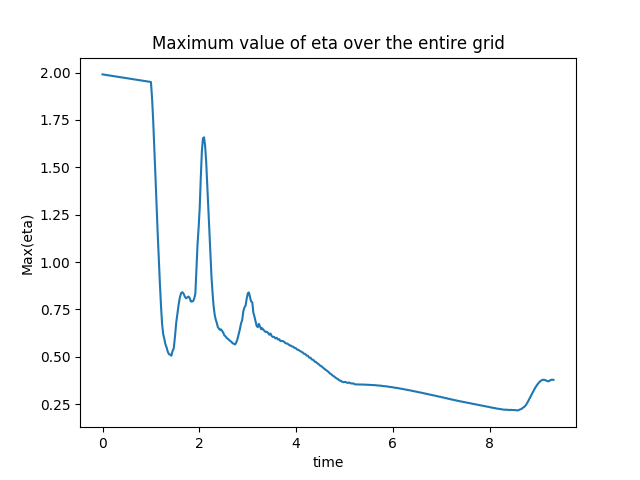

Text(0.5, 1.0, 'Maximum value of eta over the entire grid')

In [16]:
plt.plot(time,eta_max)
plt.xlabel('time')
plt.ylabel('Max(eta)')
plt.title('Maximum value of eta over the entire grid')

Next we look at the file `eta.xy.asc`. This is an example of a 2D slice (or "hyperslab") of the grid function eta. In this simulation, the Carpet driver is used (adaptive mesh refinement thorn), and output is generated using the correpsonding thorn CarpetIOASCII. This output file quite a bit more complicated than the above scalar function, having a total of 13 columns:

- Column 0: time step
- Column 1: ???
- Column 2: ???
- Column 3: ???
- Column 4: ???
- Column 5: x coordinate
- Column 6: y coordinate
- Column 7: z coordinate
- Column 8: ???
- Column 9: ???
- Column 10: ???
- Column 11: ???
- Column 12: eta

In [61]:
file_data = np.genfromtxt("eta.xy.asc")

# time steps
time_steps = np.unique(file_data[:,0]) 
print("time_steps =", time_steps)

time_steps = [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300.]


time_step = 0.0
min/max= 0.0 1.99002495838536


<IPython.core.display.Javascript object>


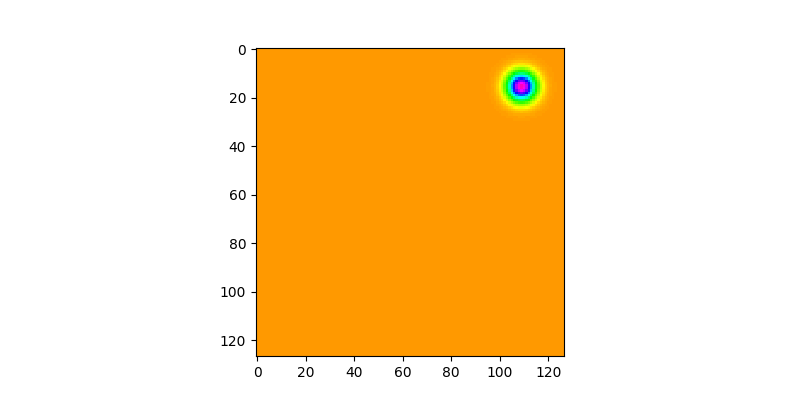

time_step = 30.0
min/max= -0.207923914074493 0.816352882538347


<IPython.core.display.Javascript object>


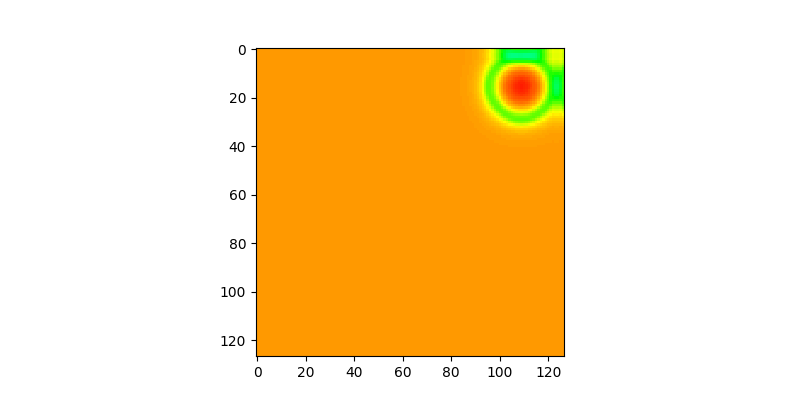

time_step = 60.0
min/max= -0.317305530717627 0.656520120884679


<IPython.core.display.Javascript object>


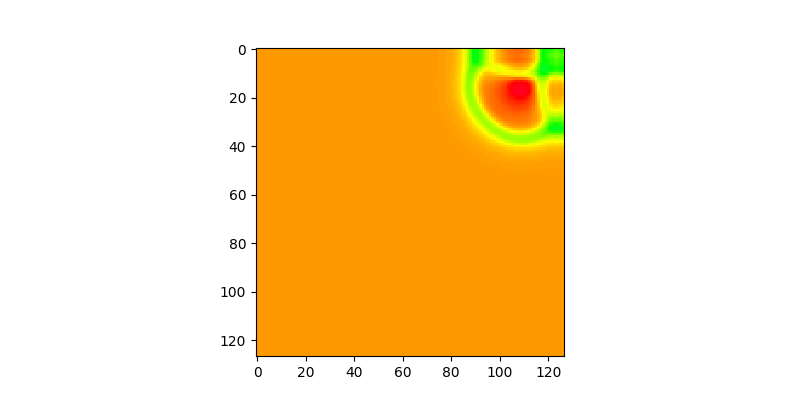

time_step = 90.0
min/max= -0.181076541393241 0.787317058350942


<IPython.core.display.Javascript object>


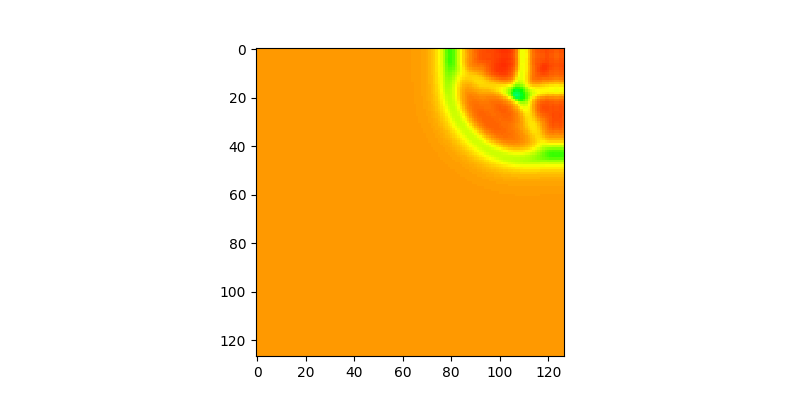

time_step = 120.0
min/max= -0.324171390451081 0.566769020398611


<IPython.core.display.Javascript object>


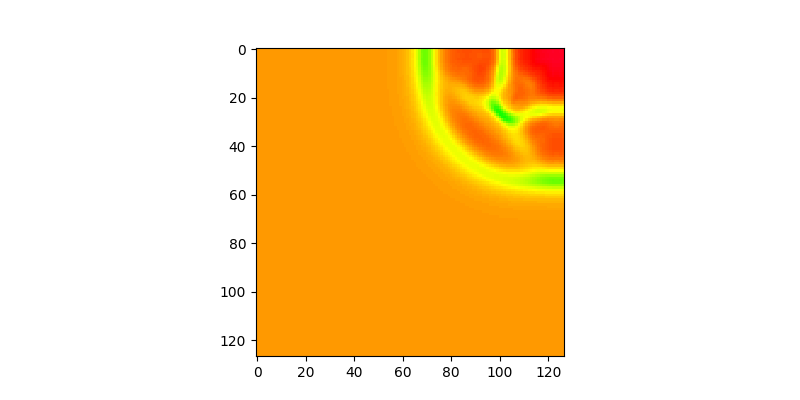

time_step = 150.0
min/max= -0.331607086078988 0.420832876995567


<IPython.core.display.Javascript object>


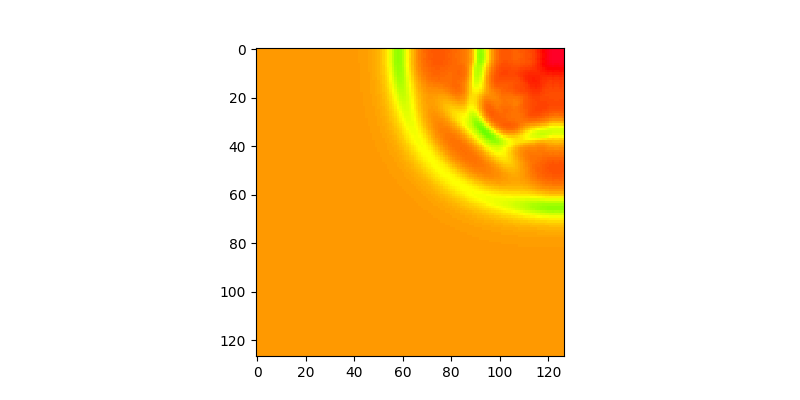

time_step = 180.0
min/max= -0.182986771806629 0.351955557436342


<IPython.core.display.Javascript object>


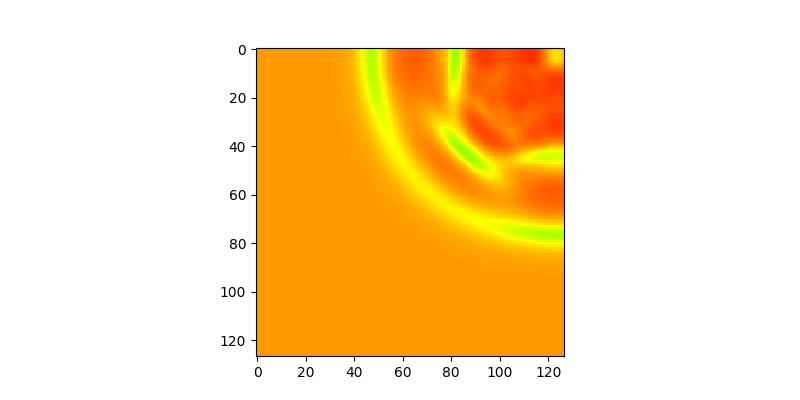

time_step = 210.0
min/max= -0.177226909316812 0.3191605301746


<IPython.core.display.Javascript object>


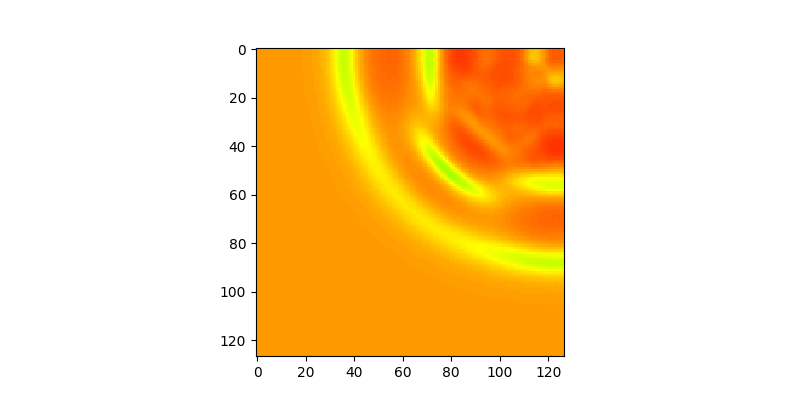

time_step = 240.0
min/max= -0.172527402131173 0.267072575528818


<IPython.core.display.Javascript object>


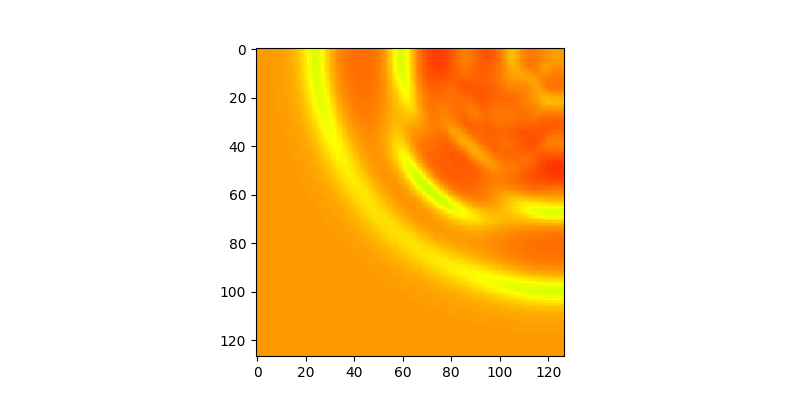

time_step = 270.0
min/max= -0.156370182449835 0.220940999016735


<IPython.core.display.Javascript object>


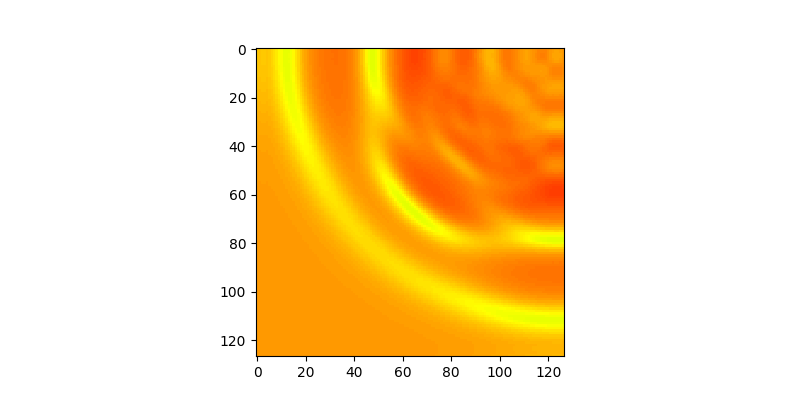

time_step = 300.0
min/max= -0.137407163976526 0.378204176487749


<IPython.core.display.Javascript object>


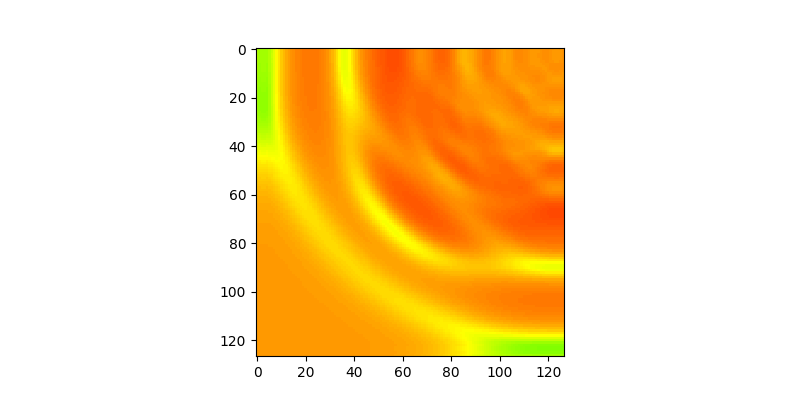

In [101]:
# plot using imshow()
import matplotlib.cm as cm

# figure properties
cmap = cm.gist_rainbow
fig_width = 8
fig_height = 4
minval = np.min(file_data[:,12])
maxval = np.max(file_data[:,12])

# make plot at each time step
for tt in time_steps: 
    print("time_step =", tt)
    ttdata = file_data[file_data[:,0]==tt, :] #find matching time blocks
    x = ttdata[:, 5]  #x coordinate in 5th column
    y = ttdata[:, 6]  #y coordinate in 6th column
    z = ttdata[:, 12] #eta value in 12th column
    zi = z.reshape(len(np.unique(y)), len(np.unique(x))) #reshape
    print('min/max=', np.min(zi), np.max(zi))
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(zi[::-1,:], cmap=cmap, clim=(minval, maxval))
    plt.show()
    plt.close()

In [111]:
# animate using imshow()
import matplotlib.cm as cm
import matplotlib.animation as animation

# figure properties
cmap = cm.gist_rainbow
fig_width = 8
fig_height = 4
minval = np.min(file_data[:,12])
maxval = np.max(file_data[:,12])

# time steps
time_steps = np.unique(file_data[:,0]) 

# extract data
def extract_data(t): 
    ttdata = file_data[file_data[:,0]==t, :] #find matching time blocks
    x = ttdata[:, 5]  #x coordinate in 5th column
    y = ttdata[:, 6]  #y coordinate in 6th column
    z = ttdata[:, 12] #eta value in 12th column
    zi = z.reshape(len(np.unique(y)), len(np.unique(x))) #reshape
    return zi[::-1, :]

# initialize plot
plt.ioff()
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_subplot(111)
data = extract_data(time_steps[0])
plot = [ax.imshow(data, cmap=cmap, clim=(minval, maxval))]

# update plot
def update_plot(frame_number, extract_data, plot):
    plot[0].remove()
    data = extract_data(time_steps[frame_number])
    plot[0] = ax.imshow(data, cmap=cmap, clim=(minval, maxval))

# make animation
fps=3
frames=np.arange(0, len(time_steps), 1)
anim = animation.FuncAnimation(
    fig, update_plot, frames, fargs=(extract_data, plot), 
    interval=1000/fps, blit=False, repeat=False)
plt.close()

# play animation
from IPython.display import HTML
HTML(anim.to_html5_video())

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


time_step = 0.0
min/max= 0.0 1.99002495838536


<IPython.core.display.Javascript object>


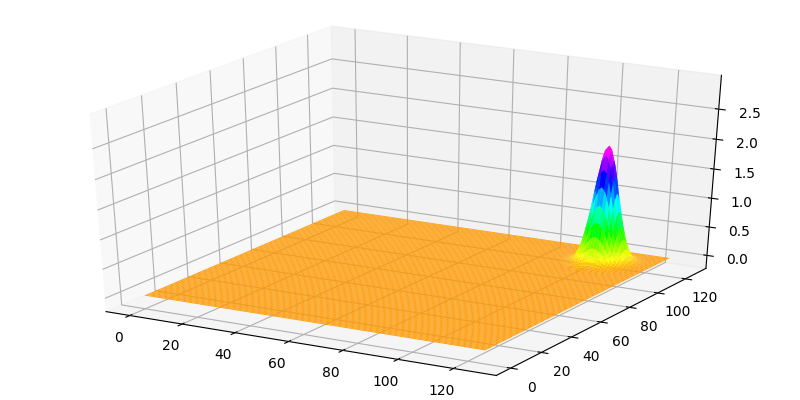

time_step = 30.0
min/max= -0.207923914074493 0.816352882538347


<IPython.core.display.Javascript object>


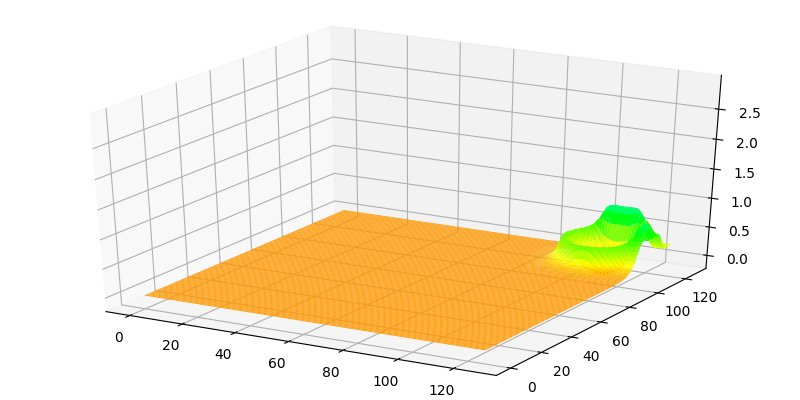

time_step = 60.0
min/max= -0.317305530717627 0.656520120884679


<IPython.core.display.Javascript object>


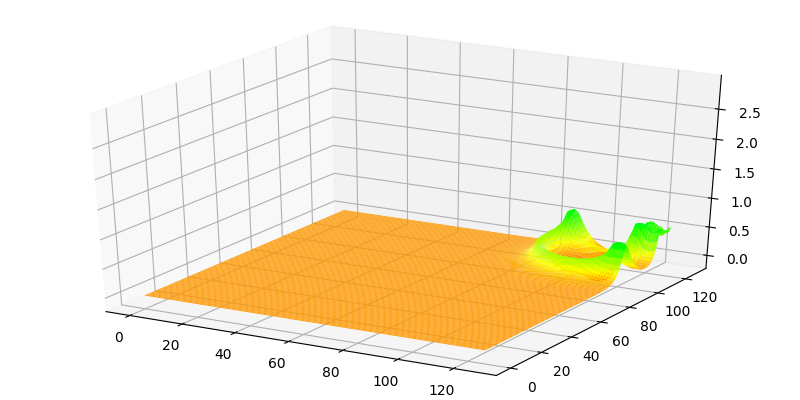

time_step = 90.0
min/max= -0.181076541393241 0.787317058350942


<IPython.core.display.Javascript object>


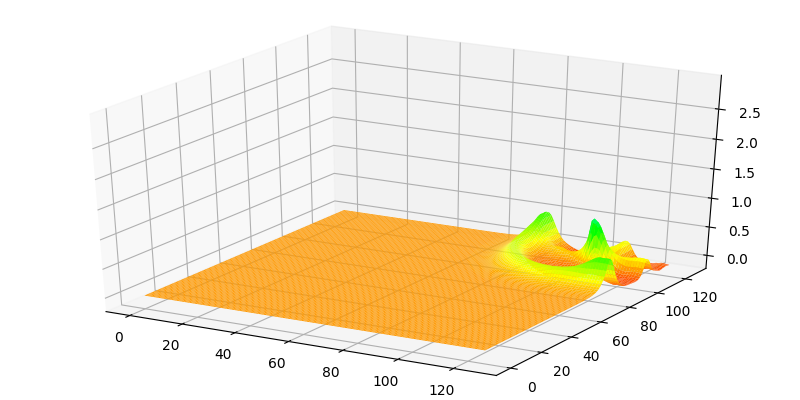

time_step = 120.0
min/max= -0.324171390451081 0.566769020398611


<IPython.core.display.Javascript object>


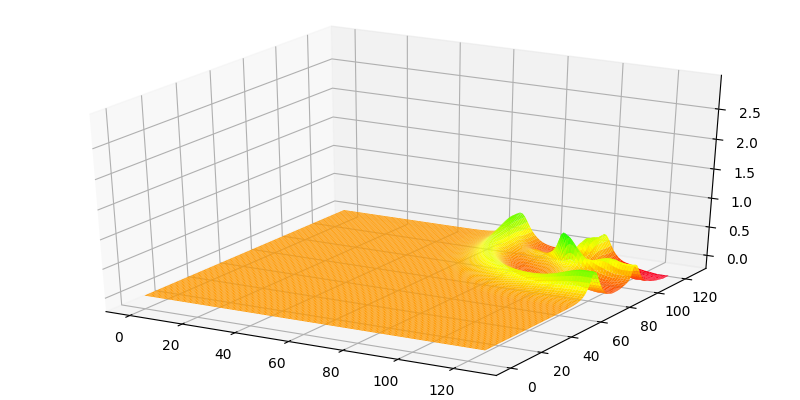

time_step = 150.0
min/max= -0.331607086078988 0.420832876995567


<IPython.core.display.Javascript object>


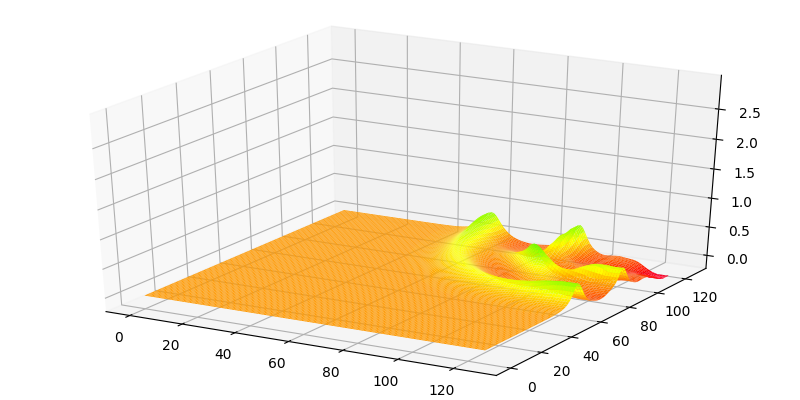

time_step = 180.0
min/max= -0.182986771806629 0.351955557436342


<IPython.core.display.Javascript object>


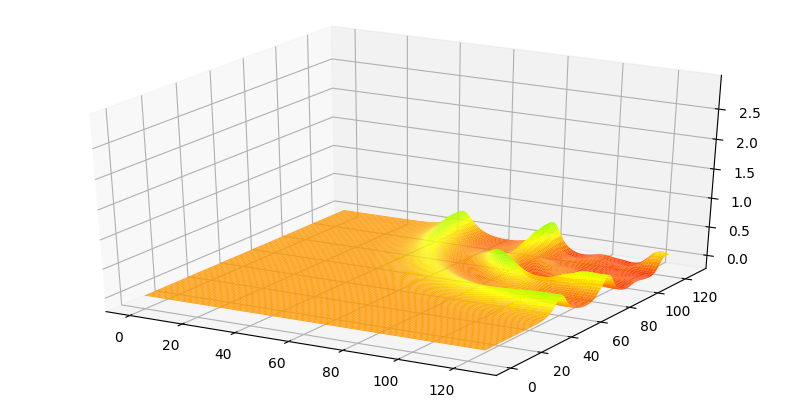

time_step = 210.0
min/max= -0.177226909316812 0.3191605301746


<IPython.core.display.Javascript object>


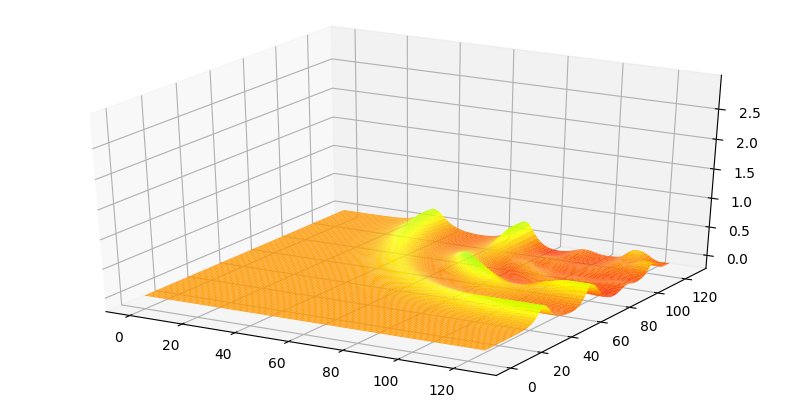

time_step = 240.0
min/max= -0.172527402131173 0.267072575528818


<IPython.core.display.Javascript object>


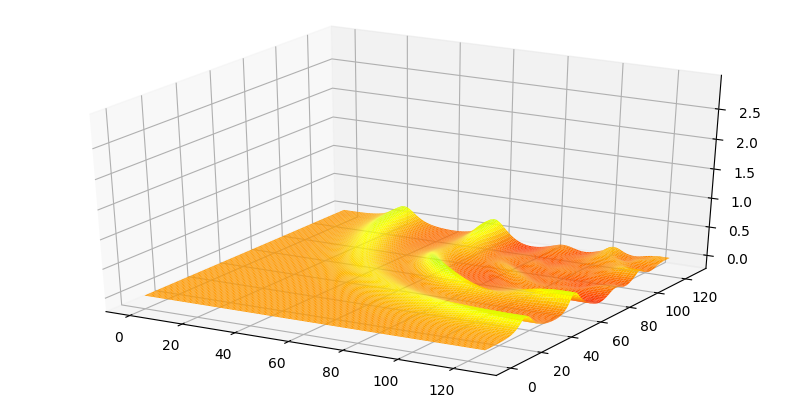

time_step = 270.0
min/max= -0.156370182449835 0.220940999016735


<IPython.core.display.Javascript object>


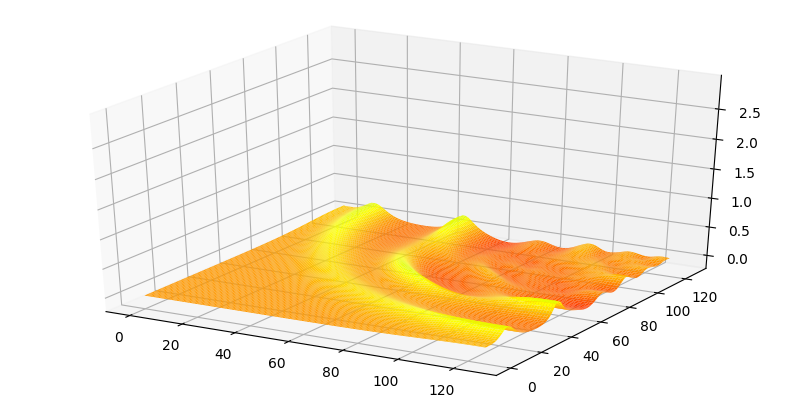

time_step = 300.0
min/max= -0.137407163976526 0.378204176487749


<IPython.core.display.Javascript object>


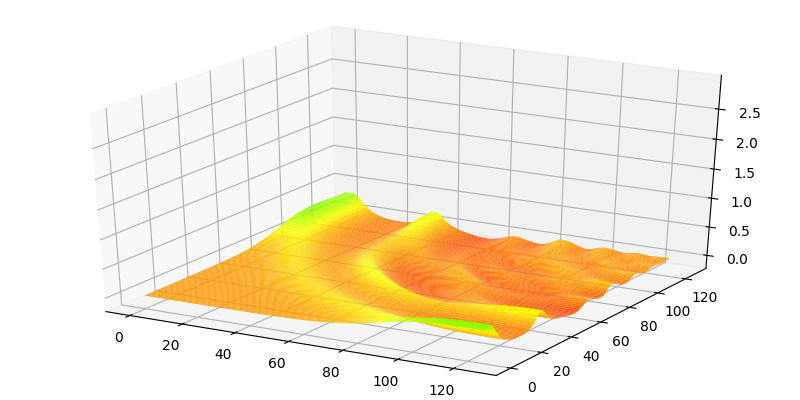

In [113]:
# plot using plot_surface()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# figure properties
cmap = cm.gist_rainbow
fig_width = 8
fig_height = 4
minval = np.min(file_data[:,12])
maxval = np.max(file_data[:,12])

# make plot at each time step
for tt in time_steps: 
    print("time_step =", tt)
    ttdata = file_data[file_data[:,0]==tt, :]
    x = ttdata[:, 5]  #x coordinate in 5th column
    y = ttdata[:, 6]  #y coordinate in 6th column
    z = ttdata[:, 12] #eta value in 12th column
    xi, yi = np.meshgrid(np.unique(y), np.unique(x))
    zi = z.reshape(len(np.unique(y)), len(np.unique(x)))
    print('min/max=', np.min(zi), np.max(zi))
    fig = plt.figure(figsize=(fig_width, fig_height))
    ax = Axes3D(fig)
    ax.set_zlim(0.5*minval, 1.5*maxval)
    ax.plot_surface(xi, yi, zi, cstride=1, rstride=1, cmap=cmap, clim=(minval, maxval))
    plt.show()
    plt.close()

In [118]:
# animate using plot_surface()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.animation as animation

# figure properties
cmap = cm.gist_rainbow
fig_width = 8
fig_height = 4
minval = np.min(file_data[:,12])
maxval = np.max(file_data[:,12])
    
# time steps
time_steps = np.unique(file_data[:,0]) 

# extract data
def extract_data(t): 
    ttdata = file_data[file_data[:,0]==t, :] #find matching time blocks
    x = ttdata[:, 5]  #x coordinate in 5th column
    y = ttdata[:, 6]  #y coordinate in 6th column
    z = ttdata[:, 12] #eta value in 12th column
    xi, yi = np.meshgrid(np.unique(y), np.unique(x))    
    zi = z.reshape(len(np.unique(y)), len(np.unique(x))) #reshape
    return xi, yi, zi

# initialize plot
plt.ioff()
fig = plt.figure(figsize=(fig_width, fig_height))
ax = Axes3D(fig)
ax.set_zlim(0.5*minval, 1.5*maxval)
x, y, data = extract_data(time_steps[0])
plot = [ax.plot_surface(x, y, data, cstride=1, rstride=1, cmap=cmap, clim=(minval, maxval))]

# update plot
def update_plot(frame_number, extract_data, plot):
    plot[0].remove()
    x, y, data = extract_data(time_steps[frame_number])
    plot[0] = ax.plot_surface(x, y, data, cstride=1, rstride=1, cmap=cmap, clim=(minval, maxval))

# make animation
fps=2
frames=np.arange(0, len(time_steps), 1)
anim = animation.FuncAnimation(
    fig, update_plot, frames, fargs=(extract_data, plot), 
    interval=1000/fps, blit=False, repeat=False)
plt.close()

# play animation
from IPython.display import HTML
HTML(anim.to_html5_video())

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting HDF5 Data
HDF5 (Hierarchical Data Format 5) is a portable binary data format. As such, it is far more efficient to read and
write than ascii formats, and it is probably what you should normally use. Here, you can see how to read and display
the data.

In [71]:
%ls *.h5

eta.xy.h5  r.xy.h5  u.xy.h5  v.xy.h5  x.xy.h5  y.xy.h5  z.xy.h5


In [73]:
import h5py

nm= FUNWAVE::u it=0 tl=0 rl=0


<IPython.core.display.Javascript object>


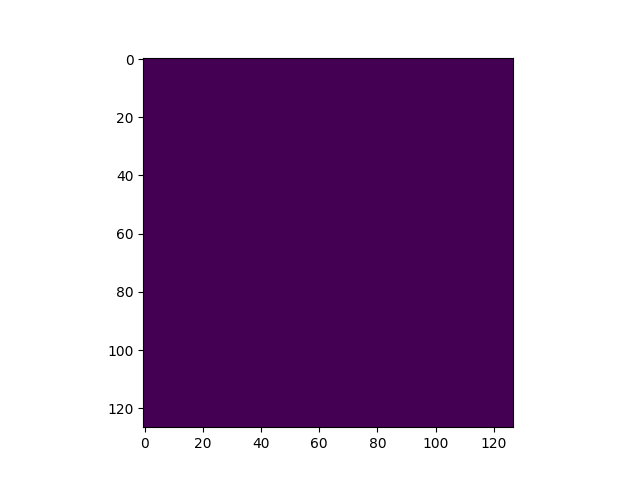

nm= FUNWAVE::u it=10 tl=0 rl=0


<IPython.core.display.Javascript object>


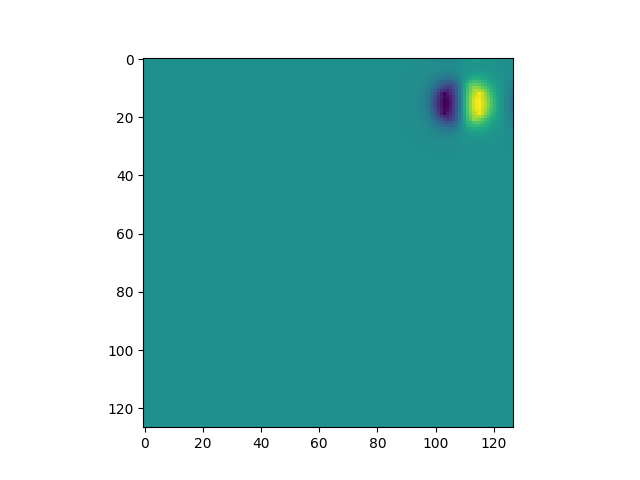

nm= FUNWAVE::u it=100 tl=0 rl=0


<IPython.core.display.Javascript object>


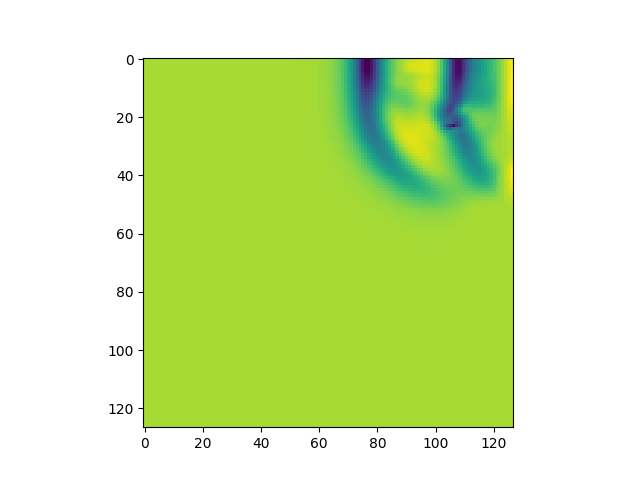

nm= FUNWAVE::u it=110 tl=0 rl=0


<IPython.core.display.Javascript object>


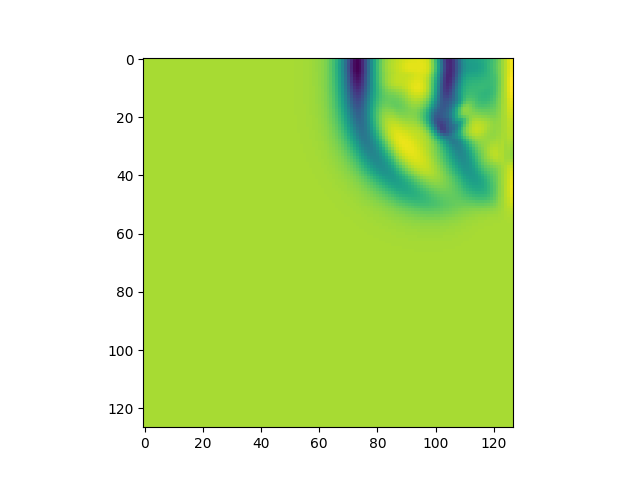

nm= FUNWAVE::u it=120 tl=0 rl=0


<IPython.core.display.Javascript object>


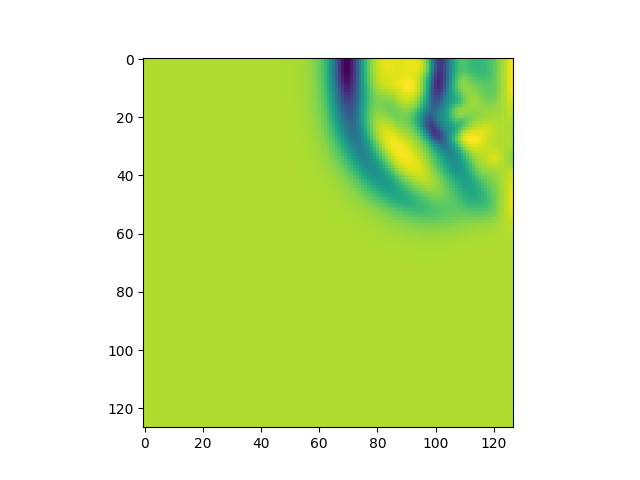

nm= FUNWAVE::u it=130 tl=0 rl=0


<IPython.core.display.Javascript object>


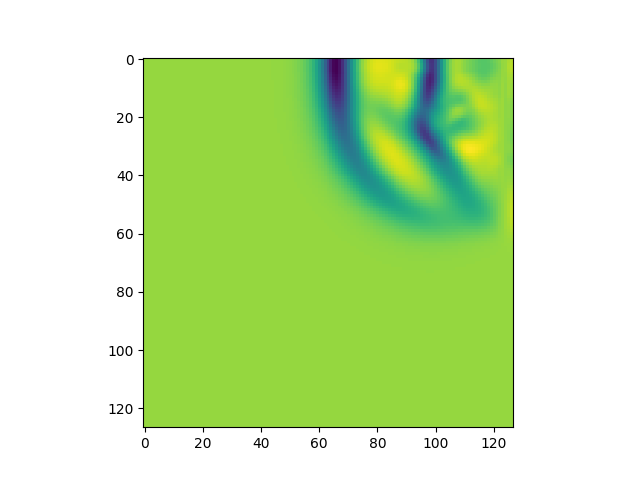

nm= FUNWAVE::u it=140 tl=0 rl=0


<IPython.core.display.Javascript object>


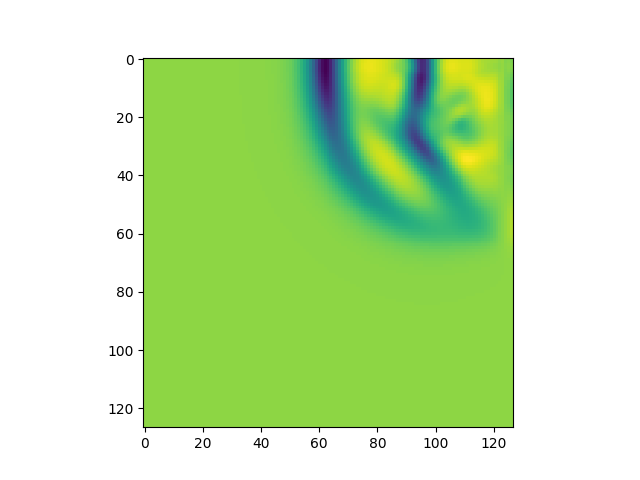

nm= FUNWAVE::u it=150 tl=0 rl=0


<IPython.core.display.Javascript object>


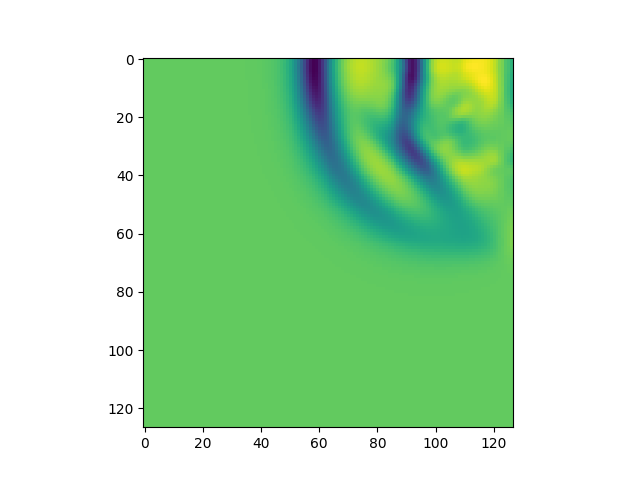

nm= FUNWAVE::u it=160 tl=0 rl=0


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


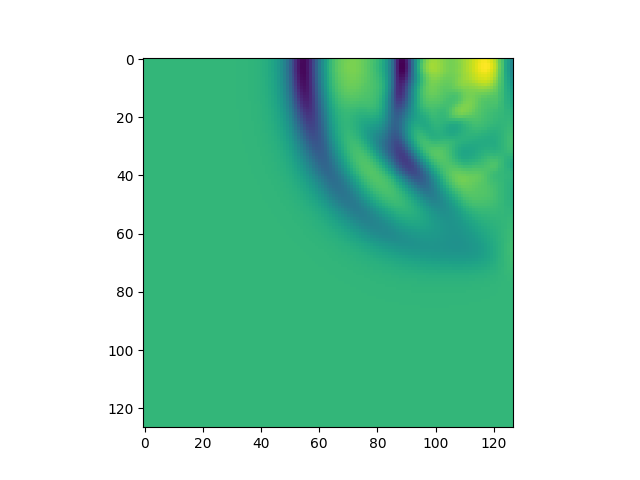

nm= FUNWAVE::u it=170 tl=0 rl=0


<IPython.core.display.Javascript object>


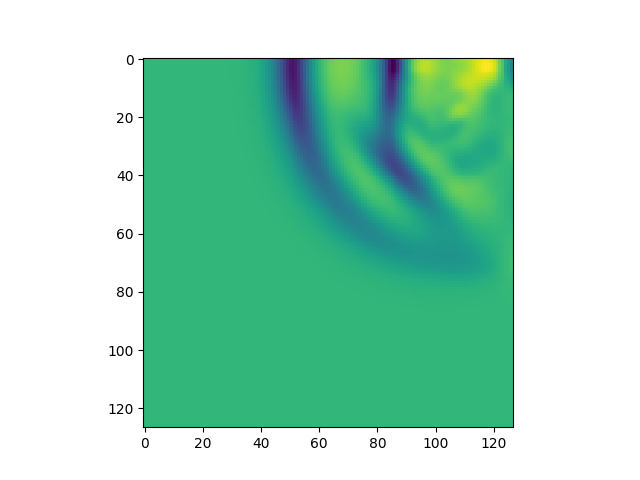

nm= FUNWAVE::u it=180 tl=0 rl=0


<IPython.core.display.Javascript object>


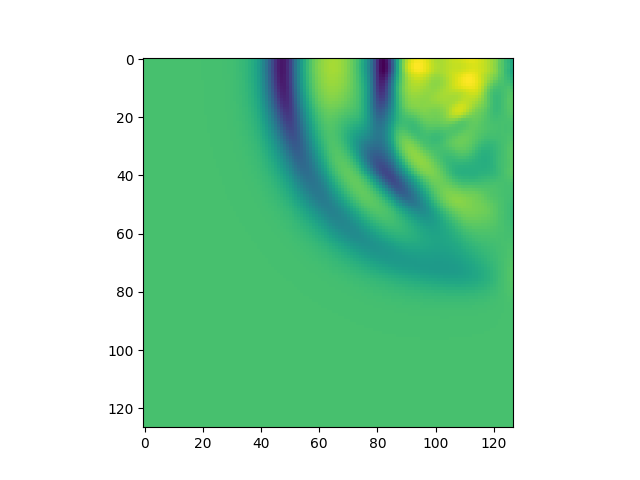

nm= FUNWAVE::u it=190 tl=0 rl=0


<IPython.core.display.Javascript object>


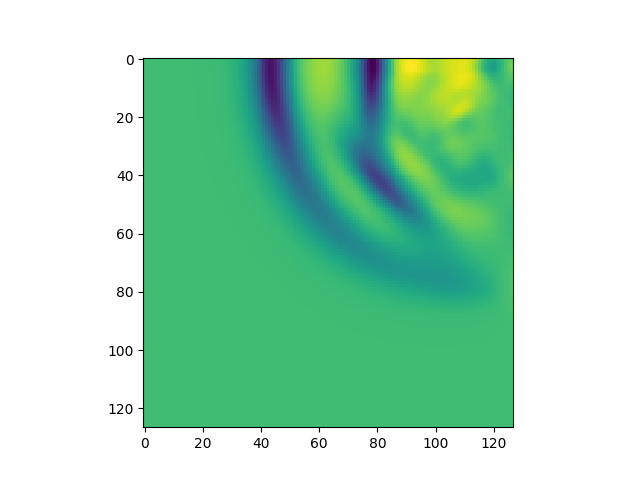

nm= FUNWAVE::u it=20 tl=0 rl=0


<IPython.core.display.Javascript object>


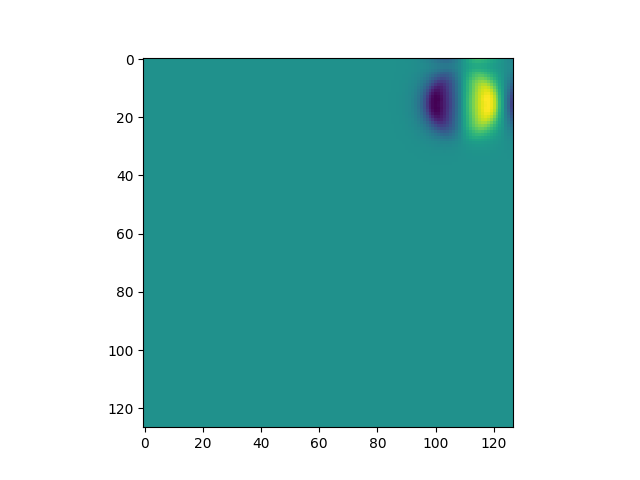

nm= FUNWAVE::u it=200 tl=0 rl=0


<IPython.core.display.Javascript object>


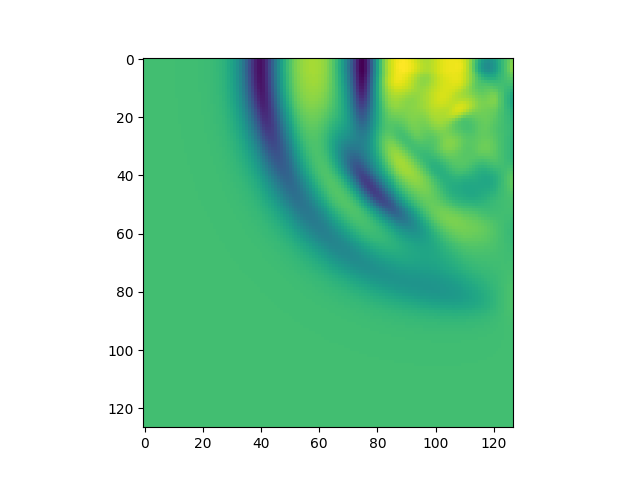

nm= FUNWAVE::u it=210 tl=0 rl=0


<IPython.core.display.Javascript object>


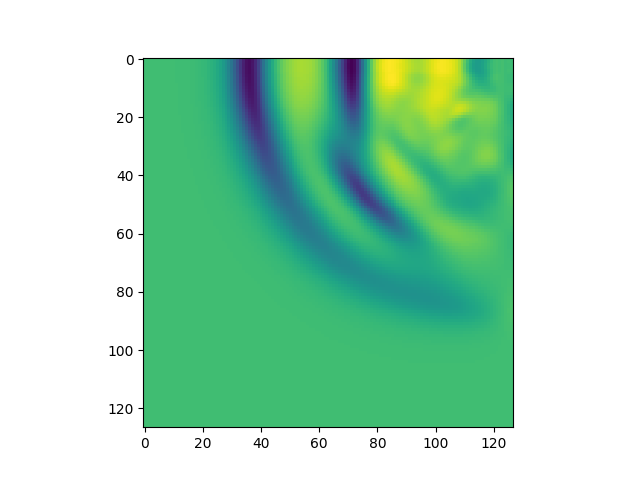

nm= FUNWAVE::u it=220 tl=0 rl=0


<IPython.core.display.Javascript object>


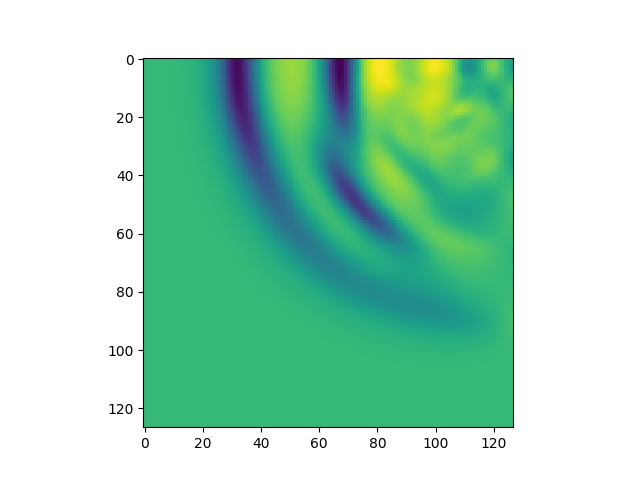

nm= FUNWAVE::u it=230 tl=0 rl=0


<IPython.core.display.Javascript object>


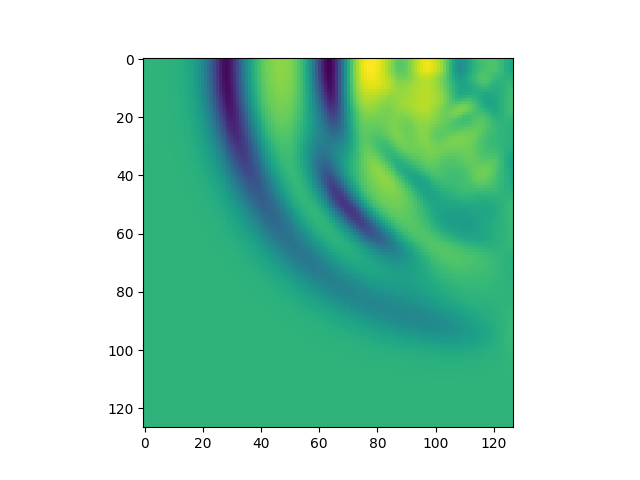

nm= FUNWAVE::u it=240 tl=0 rl=0


<IPython.core.display.Javascript object>


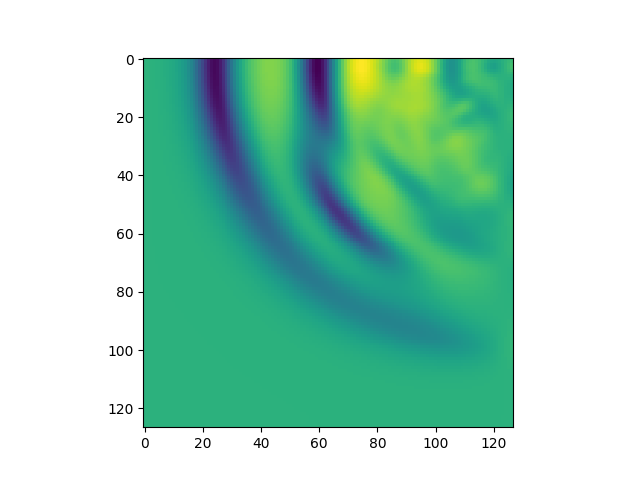

nm= FUNWAVE::u it=250 tl=0 rl=0


<IPython.core.display.Javascript object>


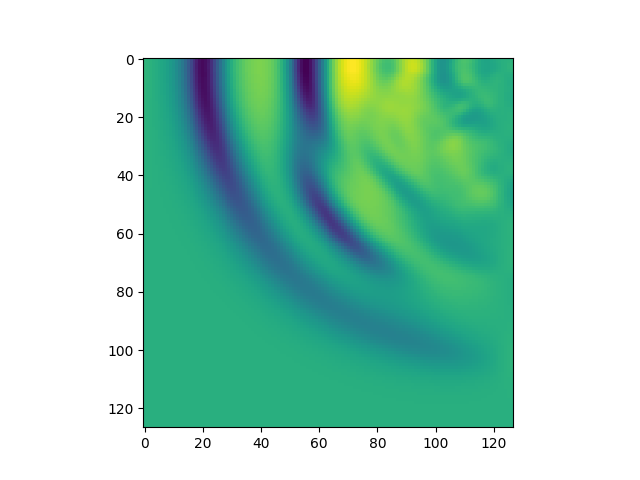

nm= FUNWAVE::u it=260 tl=0 rl=0


<IPython.core.display.Javascript object>


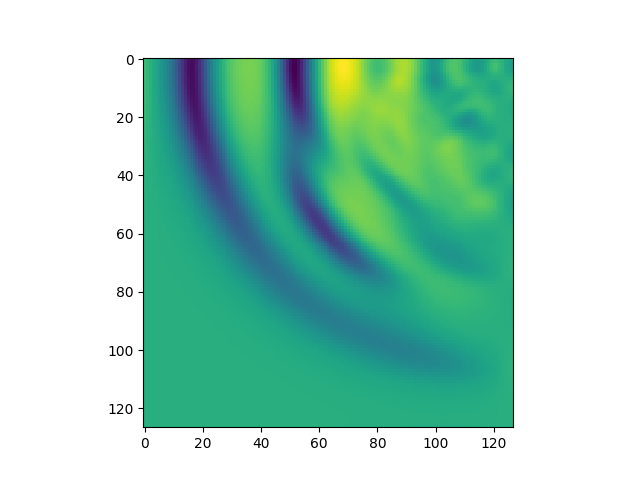

nm= FUNWAVE::u it=270 tl=0 rl=0


<IPython.core.display.Javascript object>


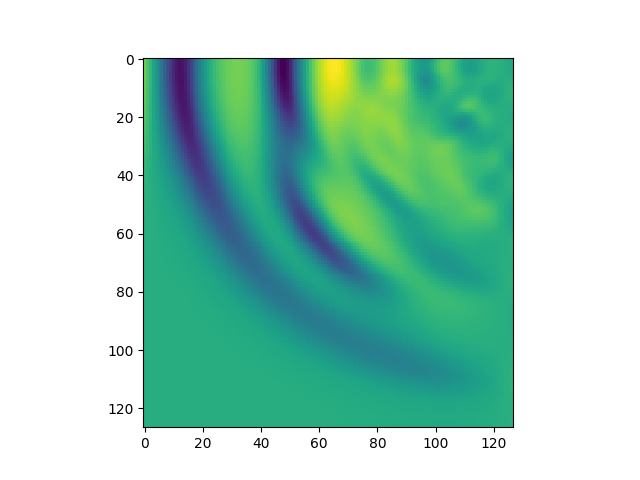

nm= FUNWAVE::u it=280 tl=0 rl=0


<IPython.core.display.Javascript object>


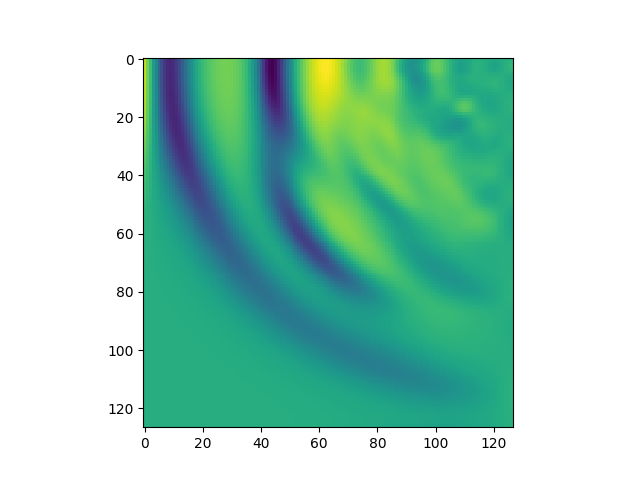

nm= FUNWAVE::u it=290 tl=0 rl=0


<IPython.core.display.Javascript object>


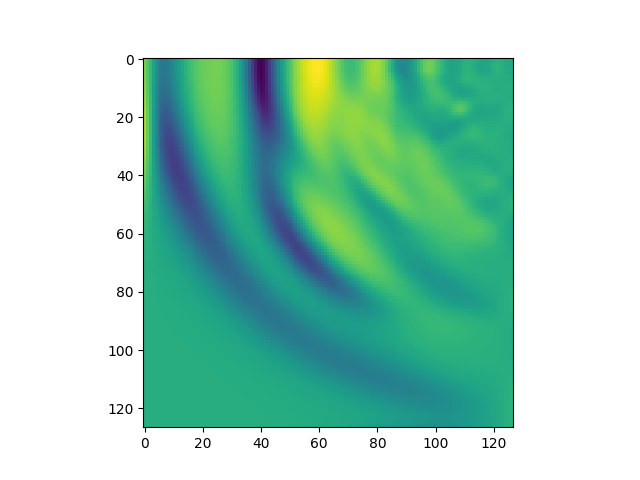

nm= FUNWAVE::u it=30 tl=0 rl=0


<IPython.core.display.Javascript object>


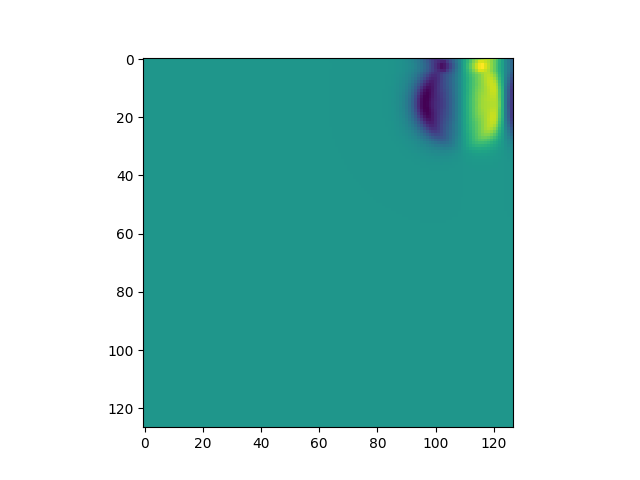

nm= FUNWAVE::u it=300 tl=0 rl=0


<IPython.core.display.Javascript object>


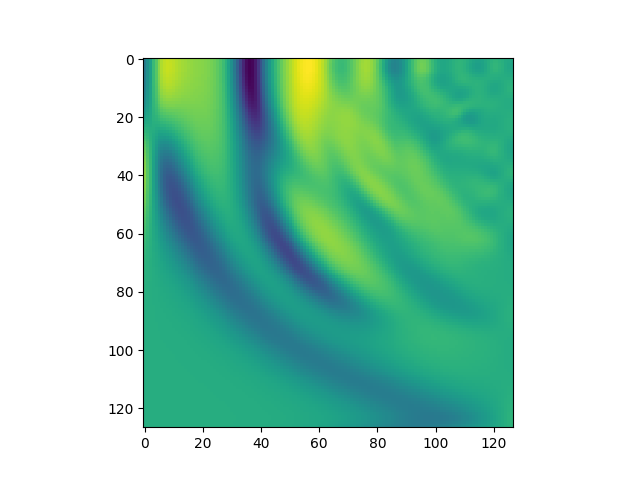

nm= FUNWAVE::u it=40 tl=0 rl=0


<IPython.core.display.Javascript object>


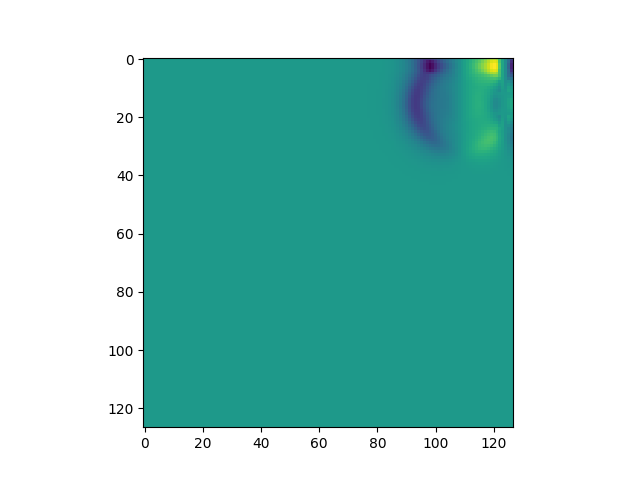

nm= FUNWAVE::u it=50 tl=0 rl=0


<IPython.core.display.Javascript object>


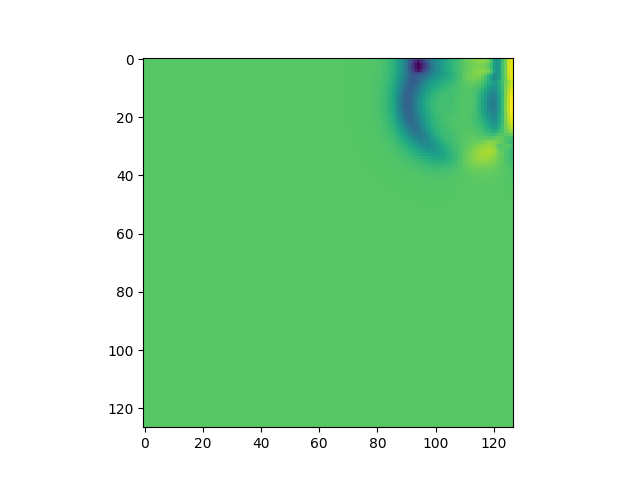

nm= FUNWAVE::u it=60 tl=0 rl=0


<IPython.core.display.Javascript object>


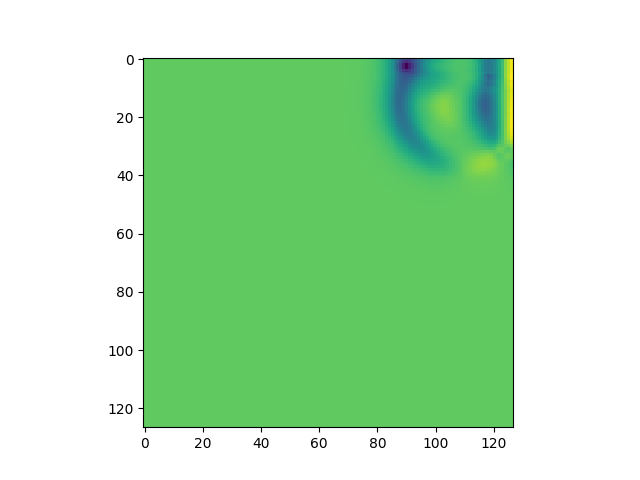

nm= FUNWAVE::u it=70 tl=0 rl=0


<IPython.core.display.Javascript object>


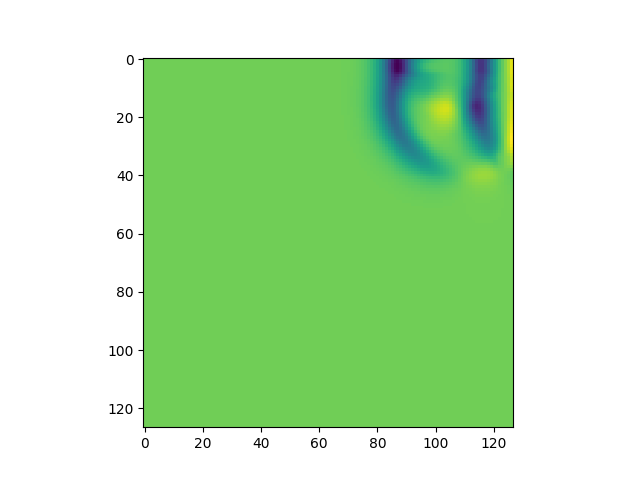

nm= FUNWAVE::u it=80 tl=0 rl=0


<IPython.core.display.Javascript object>


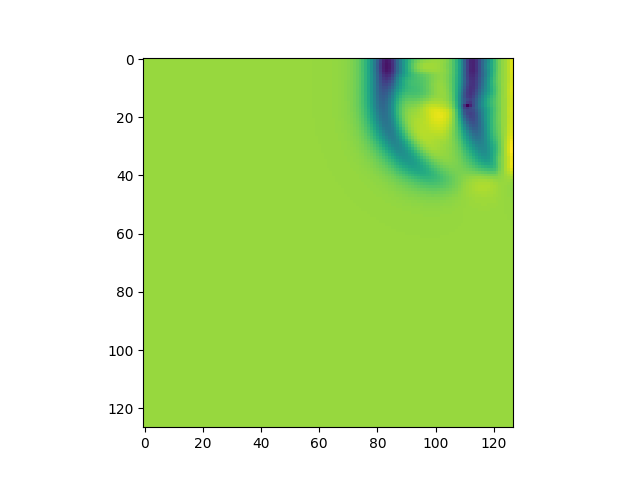

nm= FUNWAVE::u it=90 tl=0 rl=0


<IPython.core.display.Javascript object>


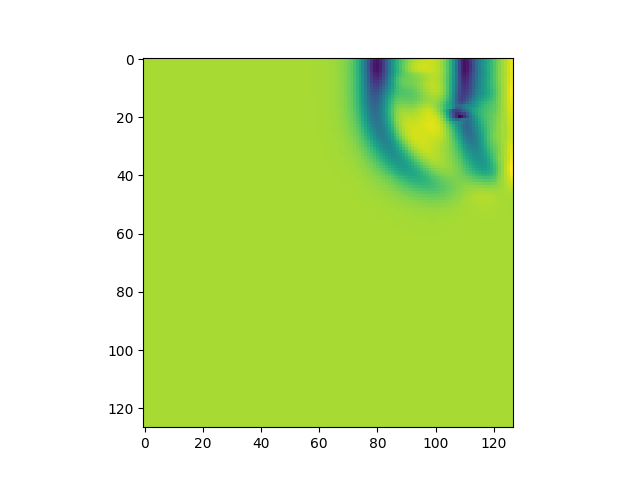

In [74]:
f5 = h5py.File("u.xy.h5")
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    print("nm=",nm)
    d=np.copy(f5[nm])
    plt.figure()
    plt.imshow(d[::-1,:])
    plt.show()

Unfortunately, each set only has one component of the plot, i.e. the part belonging to one processor. To fix this, we'll
collect data sets belonging to an iteration and display them all together. In order to make this happen, we'll need the
x and y values for each component of the grid.

In [75]:
import re

In [76]:
f5x = h5py.File("x.xy.h5")
f5y = h5py.File("y.xy.h5")
x_coords = {}
y_coords = {}
for nm in f5x:
    print(nm)
    m = re.search(r'rl=.*c=\d+',nm)
    if m:
        k = m.group(0)
        x_coords[k]=np.copy(f5x[nm])
for nm in f5y:
    m = re.search(r'rl=.*c=\d+',nm)
    if m:
        k = m.group(0)
        y_coords[k]=np.copy(f5y[nm])

GRID::x it=0 tl=0 rl=0
Parameters and Global Attributes


In [77]:
f5 = h5py.File("u.xy.h5")
mn,mx = None,None

# Compute the min and max
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    d5 = np.copy(f5[nm])
    tmin = np.min(d5)
    tmax = np.max(d5)
    if mn == None:
        mn,mx = tmin,tmax
    else:
        if tmin < mn:
            mn = tmin
        if tmax > mx:
            mx = tmax
            
# Collect all the pieces into the d5_tl dictionary
d5_tl = {}            
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    # Parse the string nm...
    m = re.search(r'it=(\d+)\s+tl=\d+\s+(rl=(\d+)\s+c=(\d+))',nm)
    # group(1) is the iteration number
    # group(2) is "rl={number} c={number}"
    # group(3) is the number in "rl={number}"
    # group(4) is the number in "c={number}"
    grid = int(m.group(1))
    comp = int(m.group(4))
    k = m.group(2)
    if grid in d5_tl:
        d5_tl[grid]["x"] += [x_coords[k]] # append to the x array
        d5_tl[grid]["y"] += [y_coords[k]] # append to the y array
        d5_tl[grid]["D"] += [f5[nm]] # append to the data array
    else:
        d5_tl[grid] = {
            "x":[x_coords[k]],
            "y":[y_coords[k]],
            "D":[f5[nm]]
        }

# Sort the keys so that we display time levels in order
def keysetf(d):
    a = [] # create an empty list
    for k in d: # for each key in d
        a.append(k) # append it to the list
    return a
kys = keysetf(d5_tl.keys())
kys.sort()

# Show the figures, combing data from the same time level
for index in kys:
    data = d5_tl[index]
    print("iteration=",index)
    plt.figure() # put this before the plots you wish to combine
    plt.pcolor(data["x"][0],data["y"][0],data["D"][0],vmin=mn,vmax=mx)
    plt.pcolor(data["x"][1],data["y"][1],data["D"][1],vmin=mn,vmax=mx)
    plt.show() # show the plot.

AttributeError: 'NoneType' object has no attribute 'group'

<h3>Questions and Exercises:</h3>

* Run the above simulation using a single process instead of two. Do the plotting routines work? What changes did you have to make. What would you need to do to make it work with 3?
* Run the code at 1/2 the resolution.
* Position the Gaussian wave at a different place on the grid.
* If you wanted to change the compiler or a compiler flag, how would you go about doing that?
* If you wanted to add another thorn to the list of thorns to compile, how would you go about doing that?
* If you wanted to create a thornlist that would check out Cactus under the Foo directory instead of the CactusFW2 directory, how would you do it?

<table><tr><td>This work sponsored by NSF grants <a href="https://www.nsf.gov/awardsearch/showAward?AWD_ID=1550551"> OAC 1550551</a> and <a href="https://www.nsf.gov/awardsearch/showAward?AWD_ID=1539567"> CCF 1539567</a></td><td><img src="https://www.nsf.gov/awardsearch/images/common/nsf_logo_bottom.png"></tr></table>